In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.DataFrame({'Size':['Size 25-28','Size 28-35','Size 35-40',
              'Size 40-45','Size 45-50','Size 50-55','Size 55-60','Size 60-65','Size 65+'],
              'Tubers':[70,31,39,34,51,38,15,6,1],
              'Mass':[0.45,0.75,1.55,2.2,4.25,4.2,2.4,1.05,0.2]
             }
               )
df

,Size,Tubers,Mass
0,Size 25-28,70,0.45
1,Size 28-35,31,0.75
2,Size 35-40,39,1.55
3,Size 40-45,34,2.20
4,Size 45-50,51,4.25
5,Size 50-55,38,4.20
6,Size 55-60,15,2.40
7,Size 60-65,6,1.05
8,Size 65+,1,0.20


In [15]:
def hacture_harvest(df,Waste,area_planted):
    
    Tubers = df["Tubers"]
    Mass = df["Mass"]
    
    df1=df.copy()
    df1.replace({'Size 25-28':'Undersize','Size 28-35':'Size I','Size 35-40':'Size I','Size 40-45':'Size I',
    'Size 45-50':'Size II','Size 50-55':'Size II','Size 60-65':'Ware','Size 55-60':'Ware',
    'Size 65+':'Ware'},inplace=True)
    print(df1)
    
    undersize_sm = np.round(df1[df1['Size']=='Undersize']['Mass'].sum(),3)
    sizeI_sm= np.round(df1[df1['Size']=='Size I']['Mass'].sum(),3)
    sizeII_sm = np.round(df1[df1['Size']=='Size II']['Mass'].sum(),3) 
    ware_sm = np.round(df1[df1['Size']=='Ware']['Mass'].sum(),3)
    seed_ms = sizeI_sm +  sizeII_sm
    sam_per =  (sizeI_sm +  sizeII_sm)/(undersize_sm+sizeI_sm+ sizeII_sm + ware_sm)

    undersize_m = np.round(df1[df1['Size']=='Undersize']['Mass'].sum() * 10_000/4.5,3)
    sizeI_m = np.round(df1[df1['Size']=='Size I']['Mass'].sum() * 10_000/4.5,3)
    sizeII_m = np.round(df1[df1['Size']=='Size II']['Mass'].sum() * 10_000/4.5,3)
    ware_m = np.round(df1[df1['Size']=='Ware']['Mass'].sum() * 10_000/4.5,3)
    seed_m = sizeI_m +  sizeII_m
      
    
    
    Weight = df['Mass'].sum()
    no_tubers = df['Tubers'].sum()
    mass_ha = (10_000/4.5) * Weight
    waste_perce = (10_000/4.5) * Weight * Waste
    good_perce = (10_000/4.5) * Weight * (1-Waste)
    field_good = (10_000/4.5) * Weight * (1-Waste)* area_planted
    
    undersize_mn = df1[df1['Size']=='Undersize']['Tubers'].sum()/undersize_sm
    sizeI_mn = df1[df1['Size']=='Size I']['Tubers'].sum()/sizeI_sm
    sizeII_mn = df1[df1['Size']=='Size II']['Tubers'].sum()/sizeII_sm
    ware_mn = df1[df1['Size']=='ware_m']['Tubers'].sum()/ware_sm
    
    undersize_m = np.round(df1[df1['Size']=='Undersize']['Mass'].sum() * 10_000/4.5,3)*area_planted
    sizeI_m = np.round(df1[df1['Size']=='Size I']['Mass'].sum() * 10_000/4.5,3)*area_planted
    sizeII_m = np.round(df1[df1['Size']=='Size II']['Mass'].sum() * 10_000/4.5,3)*area_planted
    ware_m = np.round(df1[df1['Size']=='Ware']['Mass'].sum() * 10_000/4.5,3)*area_planted
    seed_m = (sizeI_m +  sizeII_m)* area_planted
    
    print('-------------------------------------SAMPLE-----------------------------------------------')
    
    print('Total Sample Mass:',np.round(Weight,3))
    print('Total Number of Tubers:',np.round(no_tubers,3))
    print("Number of Potato Tubers Per Kg:",np.round(no_tubers,3)/np.round(Weight,3))
    
    print('\nThe  undersize Sample Mass is:', undersize_sm,"in",6,"m squ","area")
    print('The  Size I Sample Mass is:', sizeI_sm,"in",6,'m squ',"area")
    print('The  Size II Sample Mass is:', sizeII_sm,"in",6,'squ squ',"area")
    print('The  Ware Sample Mass is:', ware_sm,"in",6,'m squ',"area")
    print('The total Mass of Size I and Size II seed is', np.round(seed_ms,3),
          'Kgs in 6 metre square Sample This account',np.round(sam_per*100),3,' %')
    
    print('\n Undersize:',np.round(undersize_mn,0),'Tubers Per Kg')
    print('Size I:',np.round(sizeI_mn,0),'Tubers Per Kg')
    print(' Size II:',np.round(sizeII_mn,0),'Tubers Per Kg')
    print('Ware:',np.round(ware_mn,0),'Tubers Per Kg')
    
    print("-----------------------------------FIELD ESTIMATE------------------------------------------")
    
    
    print('\nEstimated Harvest Per Hectare:',np.round(mass_ha,2),"Kgs if Quality is 100% Good")
    print('Estimated Good Harvest Per Hectare:',np.round( good_perce,2),"Kgs assumming",(1-Waste)*100,"%","is  Good Quality")
    print('Estimated Loss Harvest Per Hectare is:',np.round(waste_perce,2),"Kgs if loss is",Waste*100,"%")
    
    print('This field area of',area_planted,'Ha has:',  good_perce * area_planted,"Kgs Harvest of Good Harvest")
                       

    
    
    print('\nThe  undersize Estimate Mass is:', undersize_m,"in",area_planted,"Ha","area if 100% is good Quality")
    print('Size I Estimate Mass is:', sizeI_m,"in",area_planted,'Ha',"area if  100% is good Quality")
    print('Size II Estimate Mass is:', sizeII_m,"in",area_planted,'Ha',"area if 100% is good Quality")
    print(' Ware Estimate Mass is:', ware_m,"in",area_planted,'Ha',"area if 100% good is Quality")

    
    
     
    print('\nThe  undersize Estimate Mass is:', undersize_m*(1-Waste),"in",area_planted,"Ha","area if",(1-Waste)*100 ,"% is good Quality")
    print('Size I Estimate Mass is:',sizeI_m*(1-Waste),"in",area_planted,'Ha',"area if",(1-Waste)*100 ,"% is good Quality")
    print('Size II Estimate Mass is:', sizeII_m*(1-Waste),"in",area_planted,'Ha',"area if", (1-Waste)*100 ,"% is good Quality")
    print(' Ware Estimate Mass is:', ware_m*(1-Waste),"in",area_planted,'Ha',"area if", (1-Waste)*100 ,"% is good Quality")
    print('Total Mass of Size I and Size II seed:', np.round(sizeI_m*(1-Waste)+sizeII_m*(1-Waste),3),"Estimate per Hactare if",(1-Waste)*100 ,"% is good Quality")
    

    undersize_mf = np.round(df1[df1['Size']=='Undersize']['Mass'].sum() * 10_000/4.5,3)*area_planted*(1-Waste)
    sizeI_mf = np.round(df1[df1['Size']=='Size I']['Mass'].sum() * 10_000/4.5,3)*area_planted*area_planted*(1-Waste)
    sizeII_mf = np.round(df1[df1['Size']=='Size II']['Mass'].sum() * 10_000/4.5,3)*area_planted*area_planted*(1-Waste)
    ware_mf = np.round(df1[df1['Size']=='Ware']['Mass'].sum() * 10_000/4.5,3)*area_planted*area_planted*(1-Waste)
    seed_mf= (sizeI_m +  sizeII_m)* area_planted*area_planted*(1-Waste)
    
    metric= [ undersize_mf, sizeI_mf,sizeII_mf, ware_mf]
    purpose = ['Undersize','Size I','Size II','Ware']
    dat = pd.concat([pd.DataFrame(purpose,columns=['Purpose']),
                    pd.DataFrame(metric,columns= ['Harvest'])],
                                  axis=1)
    
    dat['Per %'] = dat['Harvest']/dat['Harvest'].sum()*100
    print('\n',dat)
    

    plt.figure(figsize=(4,3))
    colors = ['#1888','#2894','#6783','#6783']
    wp = { 'linewidth' : 1, 'edgecolor' : "blue" }
    explode = (0.1, 0.1, 0.1, 0.3)

    plt.pie(metric,colors=colors,
    labels=purpose,autopct = '%1.1f%%',
    pctdistance=0.5,startangle=90,
    textprops={'color':'grey','weight':'light','fontsize':'large'},
    wedgeprops = wp,explode = explode,
    shadow = False,
       )
    plt.legend(loc=4, title='Claim Types');
    plt.legend(purpose,title=' ',
    loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
    plt.title('');
    

    
    metr= [ undersize_mf,sizeI_mf+sizeII_mf, ware_mf]
    purp = ['Undersize','Seed','Ware']

    
    datf =pd.concat(
        [
        pd.DataFrame(purp,columns=['Purpose']),
        pd.DataFrame(metr,columns=['Harvest'])
            ],
        axis=1)
          
    datf['Percentage'] = datf['Harvest']/datf['Harvest'].sum()*100
    print("\n",datf)
    
    plt.figure(figsize=(6,4))
    explode = [0.01,0.01,0.3]
    color = ['purple','indigo','violet']
    av =pd.Series(metr,purp)
    av.plot(kind='pie',
    autopct='%.1f%%',
    explode = explode,
    startangle=90,
    pctdistance=0.6,
    colors=color,
    textprops= {'color':'w'},
    title = 'Proportion of Harvest')
    plt.legend(loc=3,title='');
    
    


    plt.figure(figsize=(6,2))
    color=['black', 'red', 'green', 'blue', 'cyan']
    plt.bar(purp,metr,color=color)
    sns.barplot(x = purp,y = metr,palette=color,hue=purp)
    plt.axhline(y = 1/2*np.sum(metr), color = 'green', linestyle = '--')
    plt.title('Comparison of Potato Estimate Categories')
    plt.xlabel('Purpose')
    plt.ylabel('Mass(Kgs)')
    plt.legend(loc=1,title='Purpose')
    plt.show(block=True)
    
    
    
    datbh =pd.concat(
        [
        pd.DataFrame(purp,columns=['Purpose']),
        pd.DataFrame(metr,columns=['Harvest'])
            ],
        axis=1)
    datbh.set_index('Purpose',inplace=True)

    datbh.sort_values('Harvest').plot(kind='barh',figsize=(6,2),color='purple',title=('Field Harvest Estimate'))
    
    
    
    
    print('Field Harvest Estimate:',  field_good ,'assumming loss of',Waste*100,"% in area of",area_planted,"Ha")

        Size  Tubers  Mass
0  Undersize      70  0.45
1     Size I      31  0.75
2     Size I      39  1.55
3     Size I      34  2.20
4    Size II      51  4.25
5    Size II      38  4.20
6       Ware      15  2.40
7       Ware       6  1.05
8       Ware       1  0.20
-------------------------------------SAMPLE-----------------------------------------------
Total Sample Mass: 17.05
Total Number of Tubers: 285
Number of Potato Tubers Per Kg: 16.715542521994134

The  undersize Sample Mass is: 0.45 in 6 m squ area
The  Size I Sample Mass is: 4.5 in 6 m squ area
The  Size II Sample Mass is: 8.45 in 6 squ squ area
The  Ware Sample Mass is: 3.65 in 6 m squ area
The total Mass of Size I and Size II seed is 12.95 Kgs in 6 metre square Sample This account 76.0 3  %

 Undersize: 156.0 Tubers Per Kg
Size I: 23.0 Tubers Per Kg
 Size II: 11.0 Tubers Per Kg
Ware: 0.0 Tubers Per Kg
-----------------------------------FIELD ESTIMATE------------------------------------------

Estimated Harvest Per Hect

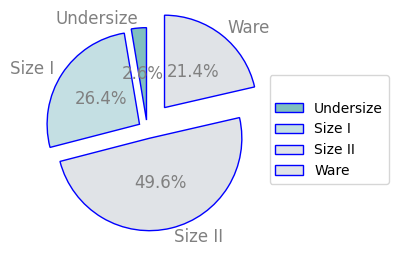

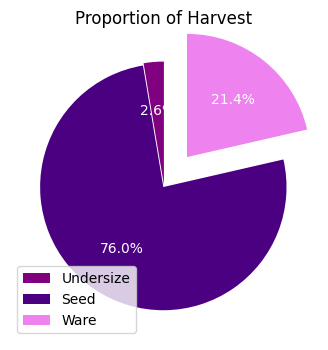

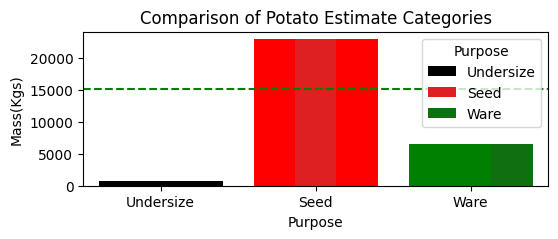

Field Harvest Estimate: 30311.11111111111 assumming loss of 20.0 % in area of 1 Ha


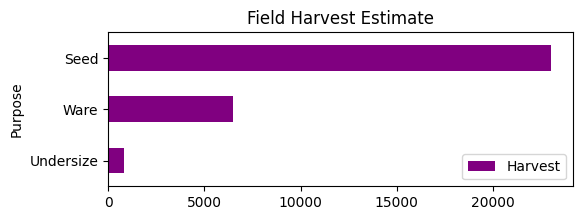

In [16]:
hacture_harvest(df,0.2,1)